# Tokyo Airbnb Data Analysis Project

## 1. Project Overview
In this project, I explored Tokyo Airbnb listings data with the goal of identifying the best neighborhoods for investors interested in opening new listings. The analysis focused on pricing trends, availability, review scores, and listing types to understand the characteristics of high-performing areas.


Firstly, I am importing all libraries i need during my work. 

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import plotly
import plotly.io as pio
import plotly.express as px
import seaborn as sns
%matplotlib inline

Upload the file I am planning to work on in csv and have a first look on it.

In [6]:
df = pd.read_csv('listings.csv', encoding='utf-8',index_col=0)

In [7]:
df.head()

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
197677,https://www.airbnb.com/rooms/197677,20241230011552,2024-12-30,city scrape,Oshiage Holiday Apartment,NaN,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,...,4.84,4.56,4.80,M130003350,f,1,1,0,0,1.13
776070,https://www.airbnb.com/rooms/776070,20241230011552,2024-12-30,city scrape,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,https://www.airbnb.com/users/show/801494,...,4.98,4.84,4.92,M130000243,f,1,0,1,0,1.79
905944,https://www.airbnb.com/rooms/905944,20241230011552,2024-12-30,city scrape,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/miso/Hosting-...,4847803,https://www.airbnb.com/users/show/4847803,...,4.91,4.78,4.78,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,t,8,8,0,0,1.69
1016831,https://www.airbnb.com/rooms/1016831,20241230011552,2024-12-30,city scrape,5 mins Shibuya Cat modern sunny Shimokita,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,https://a0.muscache.com/pictures/airflow/Hosti...,5596383,https://www.airbnb.com/users/show/5596383,...,4.98,4.92,4.90,M130001107,f,1,0,1,0,1.90
1196177,https://www.airbnb.com/rooms/1196177,20241230011552,2024-12-30,city scrape,Homestay at Host's House - Senju-Ohashi Station,Our accommodation offers: <br /><br />1. **Gr...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/72890882/05ec...,5686404,https://www.airbnb.com/users/show/5686404,...,4.92,4.74,4.82,M130007760,f,1,0,1,0,0.97


## Cleaning data
The first big step of the project to prepare the raw data for future work. 

Delete all columns with urls as I do not need them for analysis. 

In [10]:
#Cleaning and data preparation stage 
#Delete all the URL columns
df = df.drop(df.filter(like='url').columns, axis=1)

Drop all the columns that are not usefull for analysis or empty 

In [12]:
#Drop all the columns that are not usefull for analysis or empty 
df.drop(columns=['description', 'neighborhood_overview', 'scrape_id', 'last_scraped', 'source','host_location', 
                 'host_name', 'host_about', 'host_neighbourhood', 'host_verifications', 'neighbourhood',
                 'has_availability','beds','host_total_listings_count', 'minimum_minimum_nights',
                 'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
                 'neighbourhood_group_cleansed', 'calendar_updated', 'calendar_last_scraped', 'license'], 
        inplace=True, errors='ignore')

In [13]:
#For these analysis availability per year is enough, drop the rest 
df.drop(columns=['availability_30','availability_60','availability_90'], inplace=True, errors='ignore')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21058 entries, 197677 to 1319076934984156676
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          21058 non-null  object 
 1   host_id                                       21058 non-null  int64  
 2   host_since                                    21054 non-null  object 
 3   host_response_time                            20578 non-null  object 
 4   host_response_rate                            20578 non-null  object 
 5   host_acceptance_rate                          20707 non-null  object 
 6   host_is_superhost                             19699 non-null  object 
 7   host_listings_count                           21054 non-null  float64
 8   host_has_profile_pic                          21054 non-null  object 
 9   host_identity_verified                        2

Next step to handle missing data. I tried to find the best strategies for each column. 

If host_since date was missing I filled it in with the first_review date as the closest date available. 

In [16]:
#Handling missing values 
#Missing values for non-numeric values 
df['host_since'] = df['host_since'].fillna(df['first_review']) 
df['host_response_time'] = df['host_response_time'].fillna('Unknown')

As a preparation changed formats of percentage columns from 0-100% to 0-1 floats.

In [18]:
#Missing values for numeric values
pd.set_option('display.max_columns', None)
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)
df['host_response_rate'] = df['host_response_rate'] / 100.00
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'] / 100.00

Filled in median values.

In [20]:
df['host_response_rate']=df['host_response_rate'].fillna(df['host_response_rate'].median())
df['host_acceptance_rate']=df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median())
df[df['host_response_rate']!=1].head(40)

,name,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,amenities,price,minimum_nights,maximum_nights,maximum_minimum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1306664,3rd floor penthouse @ heart of TKO,7103955,2013-06-25,within a day,0.92,0.80,NaN,14.0,t,t,Shinjuku Ku,35.702630,139.741470,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,"[""Coffee maker"", ""Hangers"", ""Heating"", ""Coffee...","$61,714.00",3,180,3.0,50,214,9,1,2013-10-15,2024-11-30,4.89,4.87,4.89,4.88,4.85,4.88,4.69,f,4,4,0,0,1.57
5464293,Finest Cafe/Bar/Hotel 3F in Asagaya TOKYO /w WIFI,28340699,2015-02-25,within an hour,0.98,1.00,f,6.0,t,t,Suginami Ku,35.704590,139.637120,Entire rental unit,Entire home/apt,4,1.5,1.5 baths,0.0,"[""Hangers"", ""Heating"", ""Bed linens"", ""Self che...","$13,714.00",2,1125,2.0,350,174,18,2,2015-03-29,2024-12-10,4.42,4.53,4.39,4.75,4.82,4.57,4.40,f,5,5,0,0,1.46
5464305,Finest Cafe/Bar/Hotel 2F in Asagaya TOKYO /w WIFI,28340699,2015-02-25,within an hour,0.98,1.00,f,6.0,t,t,Suginami Ku,35.712630,139.634390,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,"[""Coffee maker"", ""Hangers"", ""Heating"", ""Coffee...","$10,714.00",2,1125,2.0,317,175,13,0,2015-04-04,2024-11-24,4.45,4.58,4.45,4.71,4.78,4.51,4.47,f,5,5,0,0,1.48
5564391,*SACRED FOREST 神の森* Natural Stylish Healing ♡ ...,28837813,2015-03-05,within a few hours,0.92,0.76,t,5.0,t,t,Nerima Ku,35.731720,139.665830,Private room in home,Private room,2,1.0,1 shared bath,1.0,"[""Paid parking off premises"", ""Coffee maker"", ...","$4,543.00",1,1125,1.0,0,207,0,0,2016-09-17,2020-04-27,4.85,4.89,4.91,4.93,4.89,4.71,4.86,f,3,0,3,0,2.05
7620544,(和室3人)最寄駅２駅-日比谷線/半蔵門線直通－浅草/上野/秋葉原/築地/銀座 /渋谷,39969626,2015-07-29,within an hour,0.89,1.00,f,2.0,t,t,Adachi Ku,35.781520,139.778460,Private room in home,Private room,3,1.0,1 shared bath,1.0,"[""Paid parking off premises"", ""Coffee maker"", ...","$26,914.00",3,365,3.0,86,29,4,0,2018-01-29,2024-11-18,4.86,4.90,4.93,4.76,4.86,4.38,4.76,t,2,1,1,0,0.34
4842239,"Access into center Tokyo,for economize travelers",24087904,2014-11-23,a few days or more,0.00,0.98,f,2.0,t,t,Bunkyo Ku,35.727610,139.763830,Entire home,Entire home/apt,3,1.5,1.5 baths,1.0,"[""Paid parking off premises"", ""Hangers"", ""Heat...","$5,500.00",1,1125,1.0,144,205,24,0,2014-12-26,2024-11-10,4.60,4.72,4.73,4.80,4.90,4.85,4.69,f,1,1,0,0,1.68
7903097,"#2 Close to Ikebukuro area, 12mins by train",9542500,2013-10-20,a few days or more,0.40,0.92,t,3.0,t,t,Itabashi Ku,35.759150,139.683650,Private room in home,Private room,2,1.0,1 shared bath,1.0,"[""Paid parking off premises"", ""Hangers"", ""Heat...","$7,864.00",4,730,4.0,363,115,18,1,2015-10-29,2024-12-06,4.83,4.83,4.85,4.86,4.84,4.63,4.77,f,3,0,3,0,1.03
7911710,#1 DoubleSize Bed room 12mins by train to kebu...,9542500,2013-10-20,a few days or more,0.40,0.92,t,3.0,t,t,Itabashi Ku,35.761230,139.683150,Private room in home,Private room,2,1.0,1 shared bath,1.0,"[""Paid parking off premises"", ""Hangers"", ""Heat...","$6,786.00",4,1125,4.0,345,94,10,0,2015-09-21,2024-11-11,4.83,4.95,4.93,4.90,4.98,4.63,4.80,f,3,0,3,0,0.83
10130437,Asakusa/Ueno Room with Private Bathroom (1F),51973423,2015-12-22,within a few hours,0.90,1.00,t,6.0,t,t,Taito Ku,35.714422,139.786633,Private room in home,Private room,4,2.0,2 baths,1.0,"[""Hangers"", ""Central air conditio

Boooleans were represented as t and f, changed them to True and False. 
Missing ones filled in with False. 

In [22]:
# Converting columns with 't' and 'f' to bool
bool_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
df[bool_columns]=df[bool_columns].apply(lambda x: x.map({'t': True, 'f': False}))

In [23]:
df[bool_columns] = df[bool_columns].astype('boolean').fillna(False)

In [24]:
df['host_is_superhost'].unique()

<BooleanArray>
[True, False]
Length: 2, dtype: boolean

Dropped few listings that have almost all values as NaN.

In [26]:
df = df.drop([1318535737969704759, 1318576670354754061, 1318585335591708266, 1318688212566405688])

Filled in NaN based on other listings of the host

In [28]:
df.loc[df['host_id']==216544005,'host_listings_count']=4

While handling missing bedrooms I relied on room_type (room most likely only has 1 bedroom).

In [30]:
#handling missing bedrooms
#if room_type has room in it, it means 1 bedroom 
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [31]:
df.loc[df['room_type'].isin(['Private room', 'Shared room', 'Hotel room']),'bedrooms']=1

For entire home type I got the median of bedrooms grouped by number of accommodates. 

In [33]:
#for entire home type we get the median of bedrooms grouped by number of accommodates 
df.loc[df['room_type']=='Entire home/apt','bedrooms']= df.loc[df['room_type']=='Entire home/apt'].groupby('accommodates')['bedrooms'].transform(lambda x: x.fillna(x.median()))

Analysing missing values in price.

In [35]:
#Analysing missing values in price 
df[df['price'].isna()]['room_type'].value_counts()

room_type
Entire home/apt    1419
Private room        779
Hotel room           42
Shared room          19
Name: count, dtype: int64

In [36]:
df[df['price'].isna()]["neighbourhood_cleansed"].value_counts()

neighbourhood_cleansed
Shinjuku Ku            543
Taito Ku               349
Sumida Ku              287
Toshima Ku             161
Shibuya Ku             144
Chuo Ku                 97
Ota Ku                  84
Minato Ku               71
Chiyoda Ku              52
Setagaya Ku             50
Suginami Ku             47
Bunkyo Ku               46
Nakano Ku               41
Shinagawa Ku            40
Katsushika Ku           37
Kita Ku                 29
Edogawa Ku              27
Itabashi Ku             25
Adachi Ku               25
Arakawa Ku              22
Meguro Ku               20
Koto Ku                 20
Nerima Ku                8
Machida Shi              4
Musashimurayama Shi      3
Chofu Shi                3
Musashino Shi            3
Akiruno Shi              3
Kunitachi Shi            3
Kodaira Shi              3
Mitaka Shi               2
Tama Shi                 2
Akishima Shi             2
Okutama Machi            2
Koganei Shi              1
Ome Shi                  1
Komae

In [37]:
df[df['price'].isna()]['bedrooms'].value_counts()

bedrooms
1.0     1824
2.0      242
3.0      128
4.0       37
5.0       14
6.0        9
7.0        3
13.0       1
11.0       1
Name: count, dtype: int64

Making price a numeric value and get median price grouped by neighbourfood, number of bedrooms and property type. 

In [39]:
#Making price a numeric value and get median price grouped by neighbourfood and property type 
df['price'] = df['price'].replace({'\\$': '', ',': ''}, regex=True)
df['price'] = pd.to_numeric(df['price'])
median_prices = df.groupby(['neighbourhood_cleansed','property_type', 'bedrooms'])['price'].median()

In [40]:
df['price'] = df.groupby(['neighbourhood_cleansed', 'property_type', 'bedrooms'])['price'].transform(lambda x: x.fillna(x.median()))

Still have some values missing as they did not fited in the grouping. Let's broaden it till all the values are filled in.

In [42]:
df[df['price'].isna()]

,name,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,amenities,price,minimum_nights,maximum_nights,maximum_minimum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2803972,11mins to Fussa station by train and 6mins walk!,13465066,2014-03-23,Unknown,1.0,1.00,False,2.0,True,True,Akishima Shi,35.705610,139.379750,Entire guest suite,Entire home/apt,2,NaN,1 bath,1.0,"[""Hangers"", ""Heating"", ""Bed linens"", ""Carbon m...",NaN,3,180,3.0,0,42,6,0,2015-05-03,2024-09-18,4.67,4.81,4.45,4.83,4.90,4.41,4.68,False,2,2,0,0,0.36
6785470,DOMUS MUSASHINO -Sakura View-,35525878,2015-06-11,Unknown,1.0,0.00,False,1.0,True,True,Kodaira Shi,35.725760,139.509540,Entire rental unit,Entire home/apt,3,NaN,1 bath,1.0,"[""Paid parking off premises"", ""Coffee maker"", ...",NaN,5,90,5.0,0,59,0,0,2015-09-22,2020-03-31,4.90,4.92,4.93,4.93,4.92,4.75,4.76,False,1,1,0,0,0.52
9001233,S&H: Private Sweet in Musician's Home with Piano,29543799,2015-03-18,within a few hours,1.0,1.00,False,13.0,True,True,Tama Shi,35.639050,139.436260,Private room in home,Private room,4,NaN,1 private bath,1.0,"[""Portable fans"", ""Hangers"", ""Heating - split ...",NaN,100,180,100.0,0,122,0,0,2015-12-09,2023-02-17,4.98,4.98,4.99,4.98,5.00,4.73,4.93,False,4,3,1,0,1.11
12376310,RIVERFRONT B&B Retreat,24647837,2014-12-09,within an hour,1.0,0.75,False,4.0,True,True,Akiruno Shi,35.725479,139.179626,Private room,Private room,4,NaN,2 shared baths,1.0,"[""Coffee maker"", ""Hangers"", ""Heating"", ""Exteri...",NaN,1,3,1.0,0,4,0,0,2016-10-09,2019-06-30,5.00,4.25,4.25,4.50,4.75,4.75,4.00,False,4,1,3,0,0.04
16848056,52 people can stay,57699141,2016-02-07,within an hour,1.0,1.00,True,23.0,True,True,Taito Ku,35.705920,139.794980,Entire rental unit,Entire home/apt,16,NaN,19.5 baths,13.0,"[""Hangers"", ""Heating"", ""Exterior or entryway s...",NaN,7,730,7.0,168,8,0,0,2017-07-30,2019-09-14,4.13,4.75,4.38,4.38,4.75,4.50,4.25,False,23,23,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142111280725028625,L上左1 ムエタイ合宿 男女混合ホステル キックボクシング練習 歌舞伎町二丁目 駅2分 ジム無料,128325512,2017-05-01,within an hour,1.0,0.83,True,7.0,True,True,Shinjuku Ku,35.695294,139.705923,Shared room in condo,Shared room,1,NaN,1 shared bath,1.0,"[""Paid parking off premises"", ""Hangers"", ""Heat...",NaN,1,10,2.0,0,2,2,0,2024-04-29,2024-05-20,5.00,5.00,5.00,5.00,5.00,5.00,5.00,False,7,2,0,5,0.24
1155575887919231721,大山駅徒歩３分、池袋駅まで電車５分,347989591,2020-05-29,within an hour,1.0,1.00,False,9.0,True,True,Itabashi Ku,35.746780,139.700910,Entire condo,Entire home/apt,3,NaN,0 baths,1.0,"[""Hangers"", ""Heating"", ""Exterior or entryway s...",NaN,1,365,1.0,0,17,17,1,2024-06-08,2024-12-30,4.82,4.76,4.76,4.88,4.76,4.65,4.47,True,3,3,0,0,2.48
1249665016492494385,Double Room with Unit Bath,568152188,2024-03-20,within an hour,1.0,1.00,False,13.0,True,True,Katsushika Ku,35.745790,139.865040,Room in aparthotel,Private room,2,NaN,1 private bath,1.0,"[""Hangers"", ""Heating"", ""Freezer"", ""Self check-...",NaN,1,30,1.0,120,3,3,1,2024-11-10,2024-12-22,4.67,4.67,5.00,5.00,4.67,3.67,3.67,True,13,3,10,0,1.76


In [43]:
#68 is still missing, filling in with less details 
df['price'] = df.groupby(['neighbourhood_cleansed', 'property_type'])['price'].transform(lambda x: x.fillna(x.median()))

In [44]:
#51 is still missing 
df['price'] = df.groupby('neighbourhood_cleansed')['price'].transform(lambda x: x.fillna(x.median()))
df['price'] = df.groupby('property_type')['price'].transform(lambda x: x.fillna(x.median()))

Converting date columns to the correct format. 

In [46]:
# convert to date columns 
df['host_since']=pd.to_datetime(df['host_since'])

In [47]:
df['first_review']=pd.to_datetime(df['first_review'])
df['last_review']=pd.to_datetime(df['last_review'])

I have to keep NaN in reviews columns to be able to do calculations. I can not predict median or mean with reviews as it will not show the real situation. 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21054 entries, 197677 to 1319076934984156676
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   name                                          21054 non-null  object        
 1   host_id                                       21054 non-null  int64         
 2   host_since                                    21054 non-null  datetime64[ns]
 3   host_response_time                            21054 non-null  object        
 4   host_response_rate                            21054 non-null  float64       
 5   host_acceptance_rate                          21054 non-null  float64       
 6   host_is_superhost                             21054 non-null  boolean       
 7   host_listings_count                           21054 non-null  float64       
 8   host_has_profile_pic                          21054 

Let's work on bathrooms. There are two columns, but one is enough. 

In [51]:
df['bathrooms_text'].value_counts()

bathrooms_text
1 bath               14373
1.5 baths             1929
1 private bath        1499
2 baths               1054
1 shared bath          759
Half-bath              196
2 shared baths         196
3 baths                185
1.5 shared baths       154
2.5 baths               97
3 shared baths          80
Shared half-bath        70
0 baths                 67
0 shared baths          58
Private half-bath       54
4 baths                 47
4 shared baths          36
3.5 baths               32
2.5 shared baths        18
5 shared baths          17
5.5 shared baths        14
6 baths                 10
10 shared baths          8
6 shared baths           8
3.5 shared baths         8
5 baths                  7
4.5 baths                6
7 baths                  5
5.5 baths                4
7 shared baths           3
8.5 baths                2
11 baths                 2
6.5 baths                2
4.5 shared baths         1
8 baths                  1
10 baths                 1
7.5 baths    

In [52]:
df[df['bathrooms_text']=='nan']

,name,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,amenities,price,minimum_nights,maximum_nights,maximum_minimum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


I used function to alter text values to numbers and removing non-numeric values, then convert to floats as there are not whole numbers in the column.

In [54]:
import re  #to search for pattern in text values 
def clean_bathrooms(text):
    if pd.isna(text):
        return np.nan      # Return NaN if the text is NaN
    
    text = str(text).lower()
    
    # Convert half-bath related text to 0.5
    if 'half-bath' in text:
        return 0.5
    
    # Remove all non-numeric characters and keep the numbers
    numeric_value = re.sub(r'[^\d.]+', '', text)
    
    # Convert the result to a float
    if numeric_value:
        return float(numeric_value)
    return np.nan  

Filled in missing values in bathroom_text from bathroom column. Then dropped it as both have the same info.

In [56]:
df['bathrooms_text'] = df['bathrooms_text'].combine_first(df['bathrooms'])
df['bathrooms_text'] = df['bathrooms_text'].apply(clean_bathrooms)

In [57]:
df = df.drop(columns=['bathrooms'])
df.rename(columns={'bathrooms_text': 'bathrooms'}, inplace=True)

Supposing that there is no listings without bathrooms, filled in NaN and 0 with 1.

In [59]:
# Replace NaN and 0 with 1 in 'bathrooms_text' column
df['bathrooms'] = df['bathrooms'].fillna(1)
df['bathrooms'] = df['bathrooms'].replace(0, 1)

Start working with outliers. 

In [61]:
#Checking outliers in numeric values
df['bedrooms'].value_counts ()

bedrooms
1.0     14637
2.0      3025
3.0      1469
0.0      1059
4.0       626
5.0       150
6.0        52
7.0        19
8.0         8
10.0        4
9.0         3
13.0        1
11.0        1
Name: count, dtype: int64

In [62]:
#Listings for group stay 
group_listings = df[df['bedrooms']>=5]
smaller_listings = df[df['bedrooms']<5]

In [63]:
# Prices outliers 
df['price'].describe()
#Distrebution looks completely unreadable because of outliers 

count    2.105400e+04
mean     3.037684e+04
std      1.497987e+05
min      1.600000e+03
25%      1.434225e+04
50%      2.063800e+04
75%      3.294850e+04
max      1.578988e+07
Name: price, dtype: float64

Price distribution seems unrealistic that may show on mistakes in prices and really high outliers. 

In [65]:
df[df['price']==df['price'].max()]

,name,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,minimum_nights,maximum_nights,maximum_minimum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
964884292912987054,3mins walk to Station! Skytree,533583087,2023-08-24,within an hour,1.0,1.0,False,8.0,True,True,Adachi Ku,35.765635,139.812322,Entire rental unit,Entire home/apt,4,1.0,1.0,"[""Paid parking off premises"", ""Hangers"", ""Heat...",15789885.0,2,365,2.0,122,20,19,0,2023-12-17,2024-11-26,4.8,4.7,4.8,4.7,4.85,4.85,4.8,True,8,7,1,0,1.58


Had a look on the highest prices outliers and they look like mistakes in data. Let's limit the price by 500,000 yen. 

In [67]:
#Seems like there are some outliers in the expencive properties. 
df[df['price']>500000]
#After researcing the properties their prices are mistaken in the table 

,name,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,minimum_nights,maximum_nights,maximum_minimum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21080730,なごみ ホテル (NAGOMI HOTEL NIPPORI) - プレミアムツイン,151954517,2017-09-24,within an hour,1.00,1.00,False,6.0,True,True,Arakawa Ku,35.732780,139.779930,Room in hotel,Hotel room,2,1.0,1.0,"[""Fire extinguisher"", ""Smoke alarm"", ""TV"", ""Wi...",999999.0,1,1125,1.0,16,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,6,0,0,0,NaN
40953417,3min->JR Oimachi Station/Japanese Superior Room,311084939,2019-11-21,a few days or more,0.00,1.00,False,1.0,True,True,Shinagawa Ku,35.603400,139.732500,Room in hotel,Private room,5,1.0,1.0,"[""TV"", ""Wifi"", ""Essentials"", ""Heating"", ""Hair ...",999999.0,1,30,1.0,270,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,0,1,0,NaN
41034731,Asakusa Kuramae Free Wi-Fi！NewOpen Family Room#1,309123931,2019-11-13,within an hour,1.00,1.00,False,6.0,True,True,Taito Ku,35.702290,139.788190,Room in hotel,Private room,4,1.0,1.0,"[""Paid parking off premises"", ""Hangers"", ""Heat...",614597.0,1,1125,1.0,263,51,0,0,2020-02-24,2023-04-01,4.71,4.86,4.84,4.55,4.65,4.49,4.65,True,6,0,6,0,0.86
943946046200926538,【ZEROの家】Spacious 2LDK House with Parking Space,343597615,2020-04-11,within an hour,1.00,0.97,True,4.0,True,True,Mitaka Shi,35.680200,139.535010,Entire home,Entire home/apt,6,1.0,2.0,"[""Hangers"", ""Heating"", ""Exterior or entryway s...",7999999.0,3,31,3.0,77,22,22,3,2024-04-18,2024-12-16,5.00,5.00,5.00,4.91,5.00,4.82,4.86,False,2,2,0,0,2.57
964884292912987054,3mins walk to Station! Skytree,533583087,2023-08-24,within an hour,1.00,1.00,False,8.0,True,True,Adachi Ku,35.765635,139.812322,Entire rental unit,Entire home/apt,4,1.0,1.0,"[""Paid parking off premises"", ""Hangers"", ""Heat...",15789885.0,2,365,2.0,122,20,19,0,2023-12-17,2024-11-26,4.80,4.70,4.80,4.70,4.85,4.85,4.80,True,8,7,1,0,1.58
1049665661435824804,横二 307 大床/WIFI/近晴空塔,551628763,2023-12-19,Unknown,1.00,1.00,False,1.0,True,True,Sumida Ku,35.705162,139.814099,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Wifi"", ""Air conditioning""]",799999.0,1,365,1.0,271,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1,1,0,0,NaN
1118654233807038574,家電キッチン完備のペントハウス,283486959,2019-08-06,within a few hours,1.00,1.00,False,2.0,True,True,Arakawa Ku,35.726411,139.779123,Room in hotel,Private room,14,1.0,1.0,"[""Smoke alarm"", ""TV"", ""Wifi"", ""Kitchen"", ""Exte...",999999.0,1,365,1.0,270,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,0,2,0,NaN
1156934963204388535,池袋まで1駅！一軒家貸し切り、ベッド4台、最大8名！/B015m,558808564,2024-01-26,within an hour,1.00,1.00,True,8.0,True,True,Toshima Ku,35.741330,139.718420,Entire home,Entire home/apt,8,1.0,2.0,"[""Hangers"", ""Heating"", ""Bed linens"", ""Freezer""...",800000.0,2,365,2.0,269,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,7,7,0,0,NaN
1160326073905220268,Takosago Lodge,506674744,2023-03-23,within an hour,1.00,1.00,False,11.0,True,True,Katsushika Ku,35.746550,139.867940,Entire home,Entire home/apt,6,1.0,2.0,"[""Heating"", ""Bed linens"", ""Self check-in"", ""Ba...",4736966.0,1,1125,5.0,270,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,11,3,6,2,NaN


In [68]:
df = df[df['price']<500000]

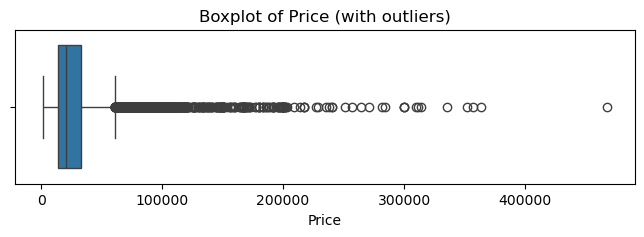

In [69]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price (with outliers)')
plt.xlabel('Price')
plt.show()

After visualizing with a box plot, it seems like it is still a lot of outliers. Calculated outliers below with quantile method. 

In [71]:
df['price'].describe()

count     21021.000000
mean      27352.318420
std       23238.152142
min        1600.000000
25%       14304.000000
50%       20638.000000
75%       32857.000000
max      467393.000000
Name: price, dtype: float64

In [72]:
#Lets calculate outliers 
twenty_fifth = df['price'].quantile(0.25)
seventy_fifth = df['price'].quantile(0.75)
iqr = seventy_fifth-twenty_fifth
upper = seventy_fifth + (1.5*iqr)
lower = twenty_fifth - (1.5*iqr)
df = df[(df['price'] >= lower) & (df['price'] <= upper)]

Visualizing price distribution. 

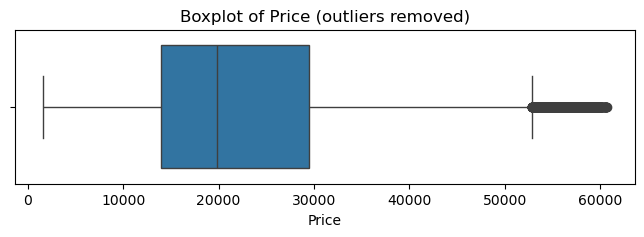

In [74]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price (outliers removed)')
plt.xlabel('Price')
plt.show()

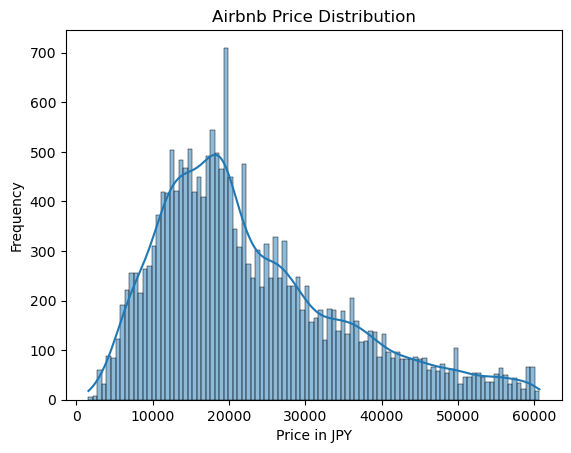

In [75]:
plt.figure()
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Airbnb Price Distribution")
plt.xlabel("Price in JPY")
plt.ylabel("Frequency")
plt.savefig("price_dist.png")
plt.show()

In [76]:
#after deleting mistaken values price destribution looks resonable 

Handling outliers in minimum nights rental period. 

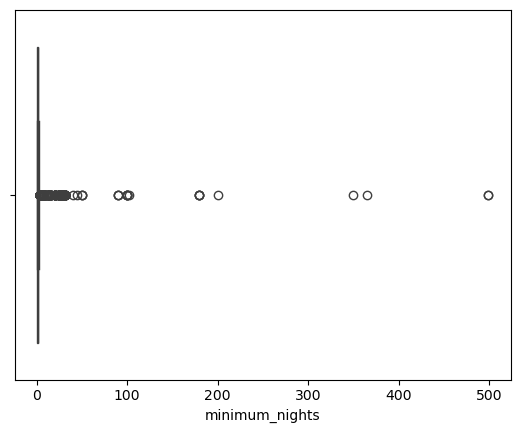

In [78]:
plt.figure()
sns.boxplot(x=df['minimum_nights'])
plt.show()
#Plenty of outliers with more than 30 days min stay 

In [79]:
q1 = df['minimum_nights'].quantile(0.25)
q3 = df['minimum_nights'].quantile(0.75)
iqr=q3-q1
upper_bound = q3 + 1.5 * iqr

In [80]:
upper_bound

3.5

In [81]:
#3.5 is too low. But listings with 30 or more min stay are not relevant for shortrental listing project

In [82]:
df[df['minimum_nights']>=30].shape[0]

2078

Filted listings that are available for short rental. And as we are working on short rental project, let's keep the filter till the end. 

In [84]:
df_short = df[df['minimum_nights']<10]

<Axes: xlabel='minimum_nights'>

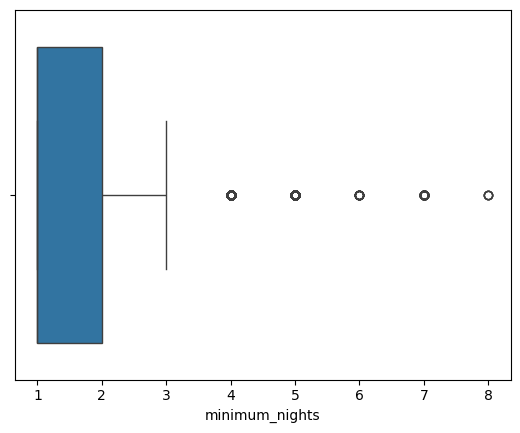

In [85]:
sns.boxplot(x=df_short['minimum_nights'])

In [86]:
#df_short.info()

In [87]:
df_short[df_short['number_of_reviews_ltm'] == 0].shape[0]

2000

The second important criteria for filtering is that we are only interested in active listings. Continue to work with only active short term listings.

In [89]:
#Filter for active short term listings 
df_short_active = df_short[df_short['number_of_reviews_ltm'] > 0]

In [90]:
df_short_active['review_scores_rating'].value_counts()
#all values within 5-scale rating 

review_scores_rating
5.00    2253
4.67     483
4.50     427
4.75     397
4.83     396
        ... 
3.95       1
3.84       1
3.72       1
3.38       1
1.50       1
Name: count, Length: 149, dtype: int64

In [91]:
df_short_active.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15454 entries, 197677 to 1318814961432616144
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   name                                          15454 non-null  object        
 1   host_id                                       15454 non-null  int64         
 2   host_since                                    15454 non-null  datetime64[ns]
 3   host_response_time                            15454 non-null  object        
 4   host_response_rate                            15454 non-null  float64       
 5   host_acceptance_rate                          15454 non-null  float64       
 6   host_is_superhost                             15454 non-null  boolean       
 7   host_listings_count                           15454 non-null  float64       
 8   host_has_profile_pic                          15454 

# Exploratory Data Analysis 
The cleaning process is over. It is time to analyze the data. 

In [93]:
df_short_active.describe()

,host_id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,maximum_minimum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.545400e+04,15454,15454.000000,15454.000000,15454.000000,15454.000000,15454.000000,15454.000000,15454.000000,15454.000000,15454.000000,15454.000000,15454.000000,15448.000000,15454.000000,15454.000000,15454.000000,15454.000000,15454,15454,15454.000000,15451.000000,15451.000000,15452.000000,15451.000000,15451.000000,15451.000000,15454.000000,15454.000000,15454.000000,15454.000000,15454.000000
mean,3.184312e+08,2020-02-15 23:02:08.122169088,0.993971,0.975651,24.470817,35.698501,139.737693,4.230296,1.153423,1.318688,23659.387634,1.703701,377.413744,3.679894,157.947263,44.471075,17.675230,1.553643,2022-09-14 20:53:27.247314432,2024-11-20 06:00:02.795392768,4.698491,4.743384,4.691390,4.767567,4.822411,4.693439,4.648316,19.794616,17.625210,1.954769,0.162935,1.885431
min,3.222340e+05,2010-12-19 00:00:00,0.000000,0.000000,1.000000,35.520940,139.095680,1.000000,0.500000,0.000000,1886.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2011-09-21 00:00:00,2023-12-31 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.030000
25%,1.389592e+08,2017-07-06 00:00:00,1.000000,0.980000,4.000000,35.688815,139.699569,2.000000,1.000000,1.000000,14386.000000,1.000000,180.000000,1.000000,80.000000,9.000000,6.000000,0.000000,2021-04-13 06:00:00,2024-11-19 00:00:00,4.590000,4.660000,4.570000,4.680000,4.760000,4.580000,4.540000,4.000000,2.000000,0.000000,0.000000,0.930000
50%,3.043299e+08,2019-10-24 12:00:00,1.000000,1.000000,11.000000,35.704197,139.728934,4.000000,1.000000,1.000000,20357.000000,1.000000,365.000000,2.000000,143.000000,23.000000,13.000000,1.000000,2023-09-22 00:00:00,2024-12-10 00:00:00,4.770000,4.810000,4.770000,4.840000,4.890000,4.750000,4.700000,9.000000,7.000000,0.000000,0.000000,1.570000
75%,5.188410e+08,2023-06-08 00:00:00,1.000000,1.000000,30.000000,35.723790,139.792723,5.000000,1.000000,1.000000,30622.500000,2.000000,365.000000,3.000000,237.000000,54.000000,24.000000,2.000000,2024-06-27 00:00:00,2024-12-21 00:00:00,4.900000,4.920000,4.920000,4.940000,4.980000,4.880000,4.840000,25.000000,22.000000,1.000000,0.000000,2.510000
max,6.683389e+08,2024-12-23 00:00:00,1.000000,1.000000,323.000000,35.830640,139.914020,16.000000,10.500000,10.000000,60666.000000,8.000000,20000.000000,127.000000,365.000000,3092.000000,818.000000,57.000000,2024-12-30 00:00:00,2024-12-30 00:00:00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,124.000000,120.000000,44.000000,29.000000,40.090000
std,1.979278e+08,NaN,0.037854,0.066167,35.951577,0.042901,0.072662,2.616092,0.503835,0.816555,12431.351562,0.911337,349.903392,7.122735,100.869118,69.478864,20.345916,1.848375,NaN,NaN,0.324280,0.295477,0.336605,0.288305,0.254193,0.281517,0.329710,25.186981,24.285401,5.072600,1.813325,1.597912


In [94]:
#Visualisation of numerical feature: rate, num of reviews and rating

Text(0.5, 1.0, 'Ratings Distribution')

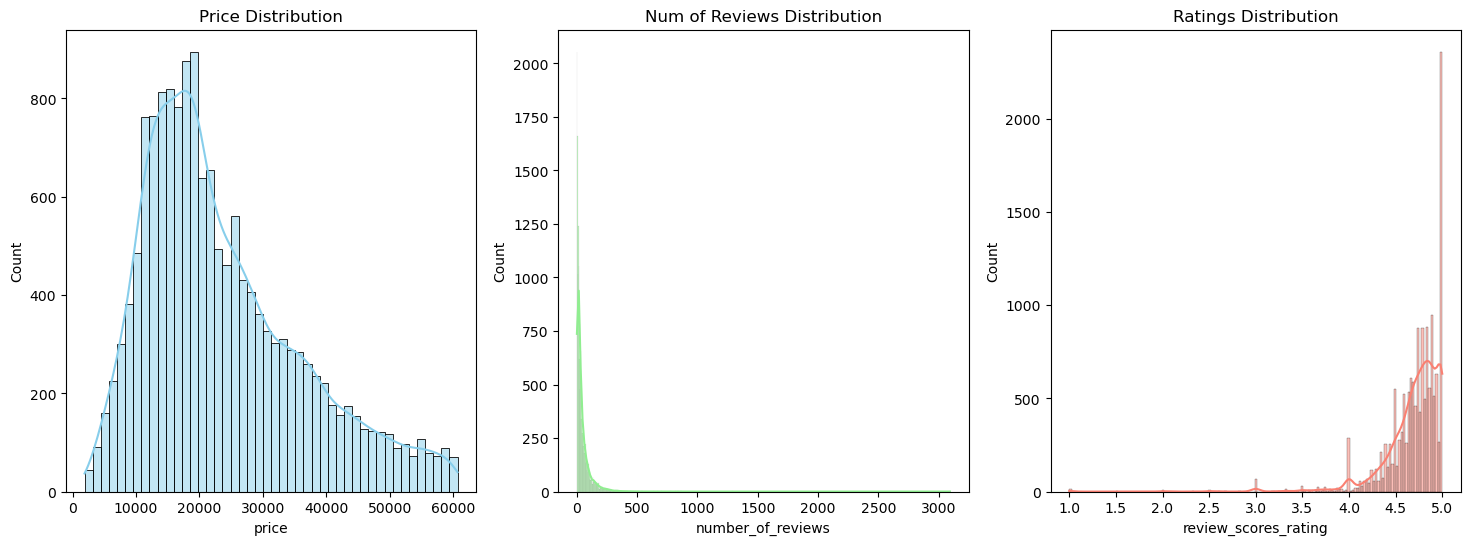

In [95]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
sns.histplot(df_short_active['price'], kde=True,ax=axes[0], color='skyblue').set_title('Price Distribution')
sns.histplot(df_short_active['number_of_reviews'], kde=True,ax=axes[1], color='lightgreen').set_title('Num of Reviews Distribution')
sns.histplot(df_short_active['review_scores_rating'], kde=True,ax=axes[2], color='salmon').set_title('Ratings Distribution')

Counting neighbourhoods with highest number of listing and visualizing them on the map of Tokyo using plotly. 

In [97]:
#Number of Listings by Neighborhood
popular_neigh = df_short_active['neighbourhood_cleansed'].value_counts().head(10).index
top_10 = df_short_active[df_short_active['neighbourhood_cleansed'].isin(popular_neigh)]

/var/folders/1c/vmvxy9892n5bj0hbvljtlf1h0000gn/T/ipykernel_19663/1083437746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood_cleansed',data=top_10,palette='viridis', order=popular_neigh)


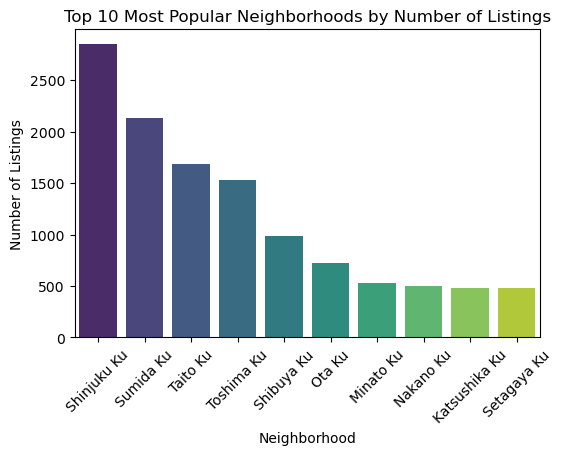

In [98]:
#Visualize them on count plot 
plt.figure(figsize=(6,4))   
sns.countplot(x='neighbourhood_cleansed',data=top_10,palette='viridis', order=popular_neigh)
plt.xticks(rotation = 45)
plt.title('Top 10 Most Popular Neighborhoods by Number of Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
#plt.savefig('top-10_pop_areas.png', dpi=200, bbox_inches='tight', transparent=False)
plt.show()

In [99]:
#Create map to see the locations of most popular nieghbourhoods 
#Need to group the data by neighborhood and get the total count of listings to get circles for each Ku on the map and location
#Change df_short_active to top_10 to see only most popular ones 
neigh_top_count = top_10.groupby('neighbourhood_cleansed').agg(
    latitude=('latitude', 'mean'),
    longitude=('longitude', 'mean'),
    listing_count = ('neighbourhood_cleansed','size')
).reset_index()

In [274]:
fig_top = px.scatter_mapbox(
    neigh_top_count,
    lat='latitude',
    lon='longitude',
    size='listing_count',
    color='neighbourhood_cleansed', 
    hover_name='neighbourhood_cleansed',
    size_max=40,
    title='Top 10 Most Popular Neighborhoods in Tokyo',
    mapbox_style="carto-positron",
    zoom=11,  
    height=600,
)
fig_top.update_layout(legend_title="Neighborhood")
#Saved the map on my computer as html link to keep it interactive
#pio.write_html(fig_top, 'interactive_map.html', include_plotlyjs='cdn')

Keep exploring data by checking median prices by neighbourhood.

In [102]:
#Further exploration needed: rental rates, transportation, big number of office buildings 

In [103]:
#Median Price by Neighborhood
price_stats = df_short_active.groupby('neighbourhood_cleansed').agg(
    median_price = ('price','median'),
).reset_index()
price_stats.sort_values(by='median_price', ascending=False)
#Create ranking to see top 10 ku rates compared to other kus 
#The more expensive ku has higher rank 
price_stats['rank'] = price_stats['median_price'].rank()

Add ranking from 1 to 49 (from cheapest to most expensve). And then looked for the most popular areas in the ranking and visualized it.

In [105]:
sorted_by_rank = price_stats.sort_values(by='rank', ascending=False)
top_10_neigh_with_rank = sorted_by_rank[sorted_by_rank['neighbourhood_cleansed'].isin(popular_neigh)]
top_10_neigh_with_rank
#Ranks between 1 to 49 (cheapest to most expensive)
#Some places are still popular even if rates are high due to convinient central location 
#Some places are low in rank that means that they offer a compatative rates 

,neighbourhood_cleansed,median_price,rank
28,Minato Ku,29482.0,47.0
39,Shibuya Ku,25491.5,44.0
45,Taito Ku,23571.0,43.0
17,Katsushika Ku,23417.0,42.0
41,Shinjuku Ku,21373.0,41.0
43,Sumida Ku,20343.0,40.0
47,Toshima Ku,19900.0,37.0
32,Nakano Ku,18035.5,32.0
38,Setagaya Ku,17441.0,30.0
37,Ota Ku,14006.0,19.0


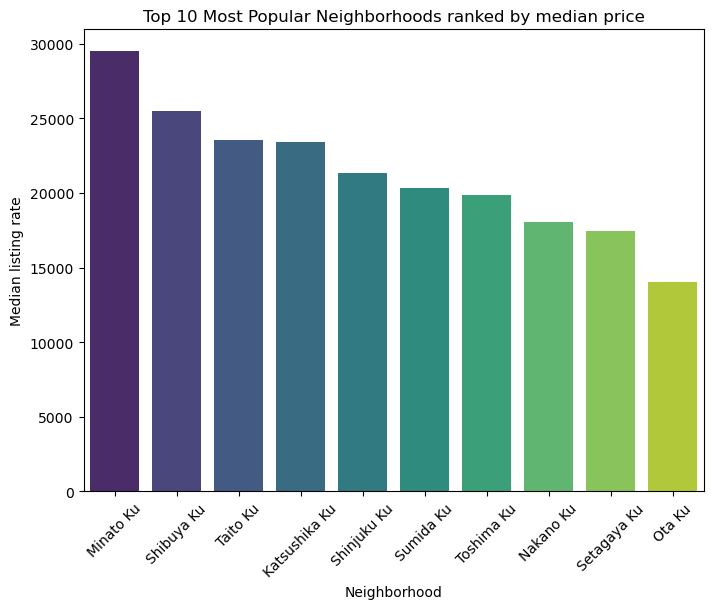

In [106]:
plt.figure(figsize=(8, 6))
sns.barplot(x='neighbourhood_cleansed', y='median_price', data=top_10_neigh_with_rank,hue='neighbourhood_cleansed', palette='viridis')
plt.xticks(rotation = 45)
plt.title('Top 10 Most Popular Neighborhoods ranked by median price')
plt.xlabel('Neighborhood')
plt.ylabel('Median listing rate')
#plt.savefig('top-10_median_price.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

Median Price by Room Type

In [108]:
#Median Price by Room Type
df_short_active.groupby('room_type')['price'].median()

room_type
Entire home/apt    21857.0
Hotel room         12982.0
Private room       14286.0
Shared room         5929.5
Name: price, dtype: float64

Filter neighbourhoods with more that 20 listings to narrow the areas range.

In [110]:
#Want to filter neighbourhoods with more that 20 listings to narrow the areas range 
#Only want areas with more than 20 listings 
valid_areas = df_short_active["neighbourhood_cleansed"].value_counts()
valid_areas = valid_areas[valid_areas > 20].index
list_area_df = df_short_active[df_short_active["neighbourhood_cleansed"].isin(valid_areas)]

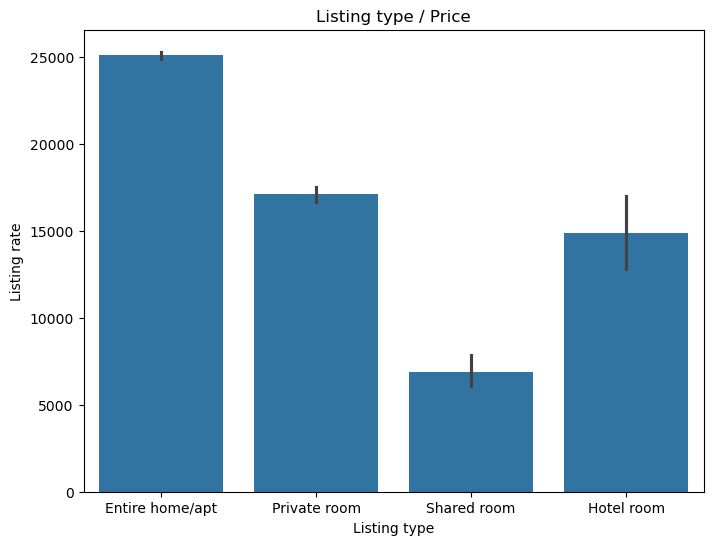

In [111]:
plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='price', data=df_short_active)
plt.title('Listing type / Price')
plt.xlabel('Listing type')
plt.ylabel('Listing rate')
#plt.savefig('Listing_type_price.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

Distribution of listing types by areas 

In [113]:
#number of listings each type by area 
list_type_by_neigh = list_area_df.groupby(['neighbourhood_cleansed','room_type'],observed=False).size().unstack() 
sorted_list_type = list_type_by_neigh.sort_values(by='Entire home/apt',ascending=False)

<Figure size 1200x600 with 0 Axes>

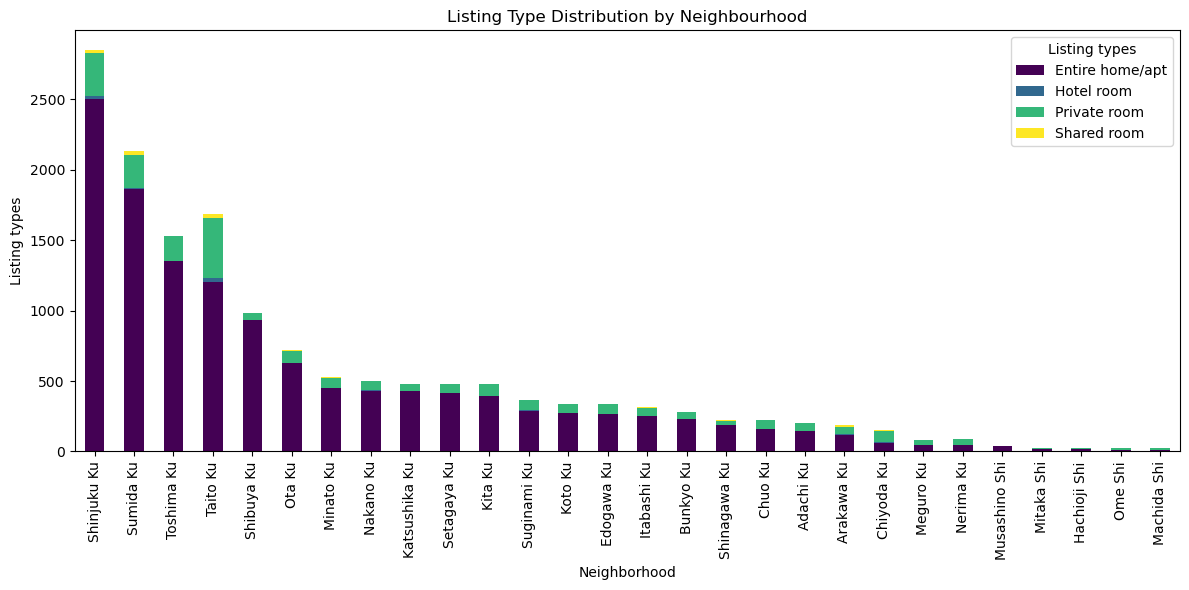

In [114]:
plt.figure(figsize=(12, 6))
sorted_list_type.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Listing Type Distribution by Neighbourhood')
plt.xlabel('Neighborhood')
plt.ylabel('Listing types')
plt.legend(title='Listing types')
plt.tight_layout()
#plt.savefig('list_type_ku.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

Median Price by Capacity (by accommodates) and visialization. 

There is a positive correlation, that mean that all the property are relatively priced.

In [116]:
#Median Price by Capacity ( by accommodates)
median_cap_price = df_short_active.groupby('accommodates')['price'].median().reset_index()

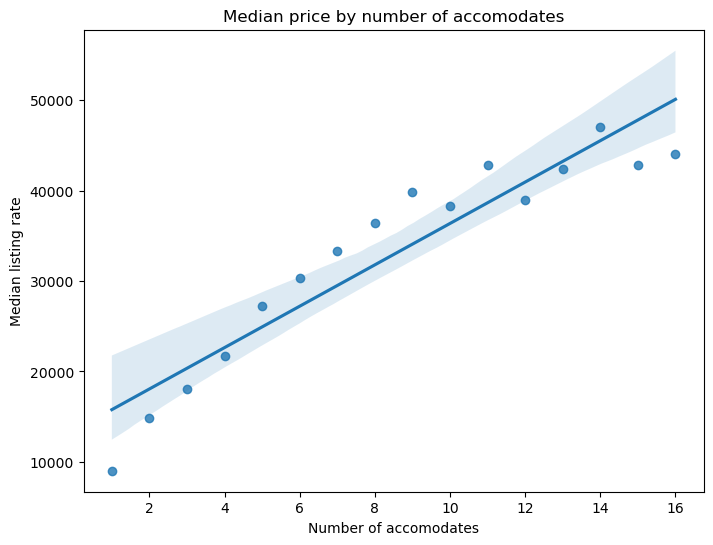

In [117]:
plt.figure(figsize=(8, 6))
sns.regplot(x='accommodates', y='price', data=median_cap_price)
#plt.xticks(rotation = 45)
plt.title('Median price by number of accomodates')
plt.xlabel('Number of accomodates')
plt.ylabel('Median listing rate')
#plt.savefig('median_rate_accom.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

In [118]:
#there is a positive correlation, that mean that all the property are relatively priced

Explored distribution of price per person.

In [120]:
price_per_person = df_short_active['price'] / df_short_active['accommodates']

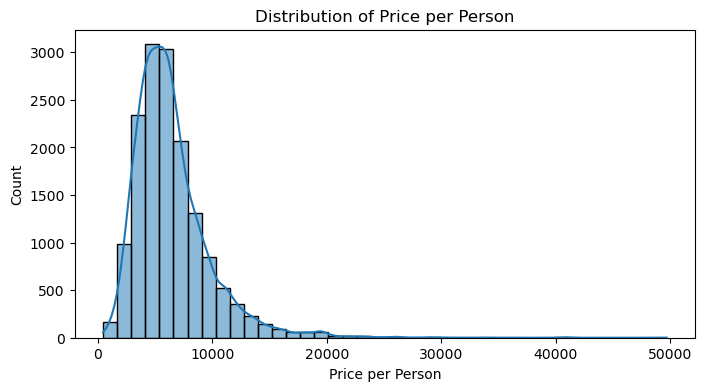

In [121]:
plt.figure(figsize=(8, 4))
sns.histplot(price_per_person,bins=40, kde=True)
plt.title('Distribution of Price per Person')
plt.xlabel('Price per Person')
plt.ylabel('Count')
#plt.savefig('price_per_person.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

Labeled the listings as Low, Mid-range and High-end properties based on price per person.

In [123]:
#splited in 3 equal groups by price per person using qcut function 
list_area_df.loc[:, 'price_category'] = pd.qcut(
    df_short_active['price'] / df_short_active['accommodates'],
    q=3,
    labels=['Low', 'Mid', 'High']
)

/var/folders/1c/vmvxy9892n5bj0hbvljtlf1h0000gn/T/ipykernel_19663/1349190124.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [124]:
list_area_df['price_category'].value_counts()

price_category
High    5132
Mid     5115
Low     5057
Name: count, dtype: int64

Show distribution of price categories within each area. For that df were grouped by areas and price category, number of listings in each category was counted. 

In [126]:
price_cat_by_neigh = list_area_df.groupby(['neighbourhood_cleansed','price_category'],observed=False).size().unstack() 
sorted_price_cat = price_cat_by_neigh.sort_values(by='High',ascending=False)

<Figure size 1200x600 with 0 Axes>

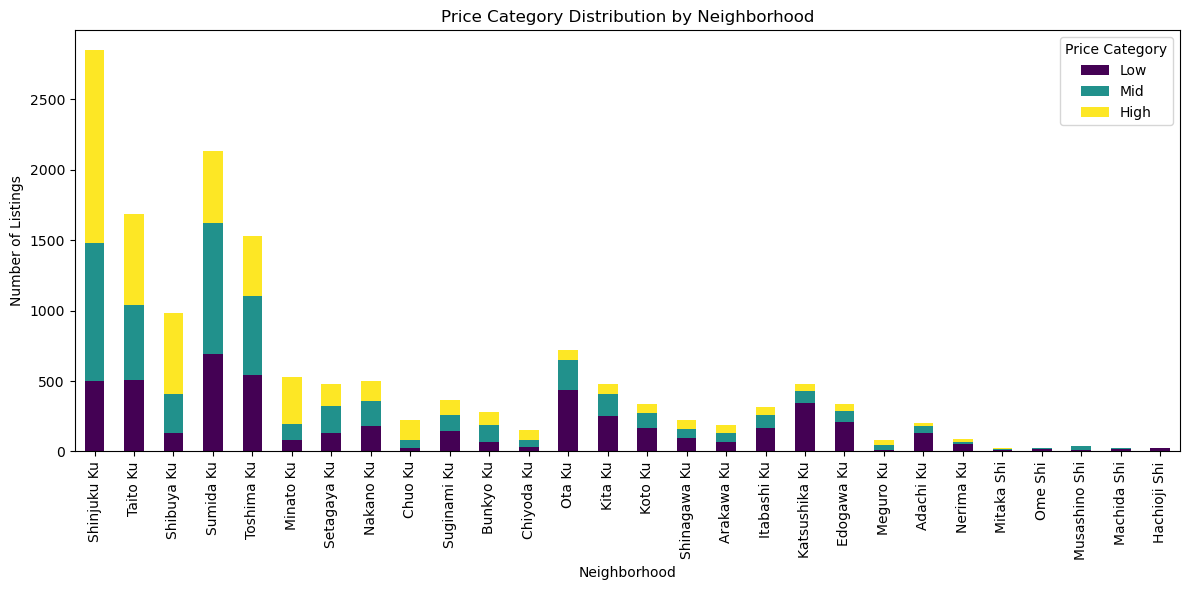

In [127]:
plt.figure(figsize=(12, 6))
sorted_price_cat.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Price Category Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.legend(title='Price Category')
plt.tight_layout()
#plt.savefig('price_cat.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

Next we checked the median ratings of top 10 most popular areas. As values are close to each other, the visualisation is not useful in this case. Generally, all the popular neighbourhoods have quite good ratings. 

In [129]:
#Most polular locations by median Reviews per Listing (using review location score)
median_location_score = list_area_df.groupby('neighbourhood_cleansed')['review_scores_location'].median().reset_index()
median_location_score = median_location_score.sort_values(by='review_scores_location', ascending=False)

In [130]:
#median_location_score

In [131]:
median_location_score[median_location_score['neighbourhood_cleansed'].isin(popular_neigh)]
#all most popular neighbourhood have high location reviews, but more center located ones are higher

,neighbourhood_cleansed,review_scores_location
13,Minato Ku,4.83
20,Setagaya Ku,4.80
21,Shibuya Ku,4.80
23,Shinjuku Ku,4.78
25,Sumida Ku,4.74
26,Taito Ku,4.74
27,Toshima Ku,4.74
16,Nakano Ku,4.73
19,Ota Ku,4.70
8,Katsushika Ku,4.67


Heat map was used to see correlations for the most of numeric values. No unexpected correlations were found. 

<Axes: >

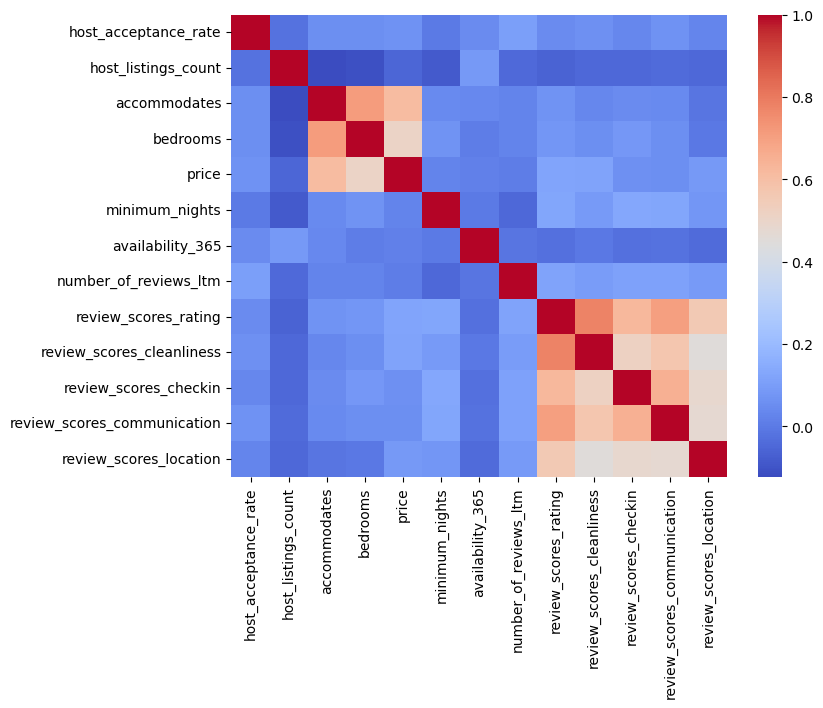

In [133]:
columns_of_interest = ['host_acceptance_rate',
'host_listings_count',                                                            
'accommodates',                                 
'bedrooms',                                     
'price',                                       
'minimum_nights',                                             
'availability_365',                                                     
'number_of_reviews_ltm',                         
'review_scores_rating',                                             
'review_scores_cleanliness',                    
'review_scores_checkin',                        
'review_scores_communication',                   
'review_scores_location']                     
df_subset = df_short_active[columns_of_interest]  

df_matrix = df_subset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(df_matrix, annot=False, cmap='coolwarm')
#plt.savefig("heat_map.png")

In [134]:
#no unexpected correlations found 

In [135]:
#Is super host status affect the price? 
superhost_price_stats = df_short_active.groupby("host_is_superhost")["price"].agg(["mean", "median", "std", "count"]).reset_index()
print(superhost_price_stats)

   host_is_superhost          mean   median           std  count
0              False  22774.071287  19414.0  11925.204189   9076
1               True  24919.207510  22138.5  13015.513919   6378


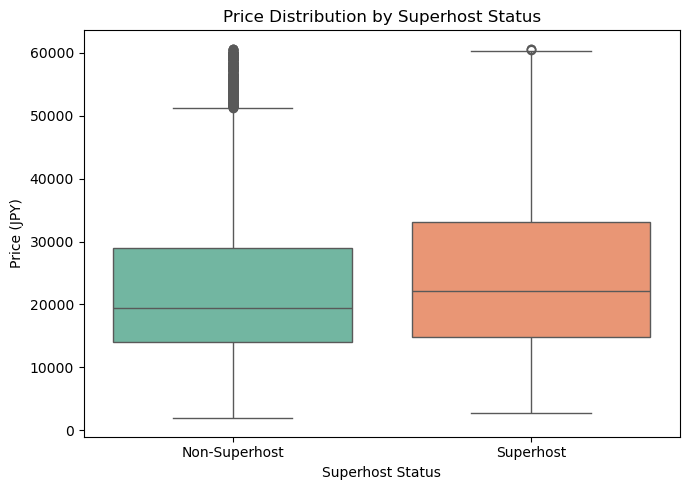

In [136]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="host_is_superhost", y="price", data=df_short_active, hue="host_is_superhost",legend=False, palette="Set2")
plt.title("Price Distribution by Superhost Status")
plt.xlabel("Superhost Status")
plt.ylabel("Price (JPY)")
plt.xticks([0, 1], ['Non-Superhost', 'Superhost'])
plt.tight_layout()
#plt.savefig('superhost.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

In [137]:
#Generally, superhost charge slightly higher rate, there is not strong impact by super host status. 

# Calculating estimate revenues 
At the last part of the project we tried sevaral methods to estimate revenues of a possible listings 

In [139]:
#Let's try to focus on more insights for investors and culculate revenues 

## Method 1: Price x Availability
First method is just a multiplication od price and availability. Unfortunately, in this data there is no information now many days a year each property was booked. 

In [141]:
list_area_df = list_area_df.copy() #made a copy to avoid the warning 
list_area_df['estimated_revenue'] = list_area_df['price'] * list_area_df['availability_365']

In [142]:
revenue_by_area = list_area_df.groupby('neighbourhood_cleansed')['estimated_revenue'].mean().reset_index()
revenue_by_area = revenue_by_area.sort_values(by='estimated_revenue', ascending=False)


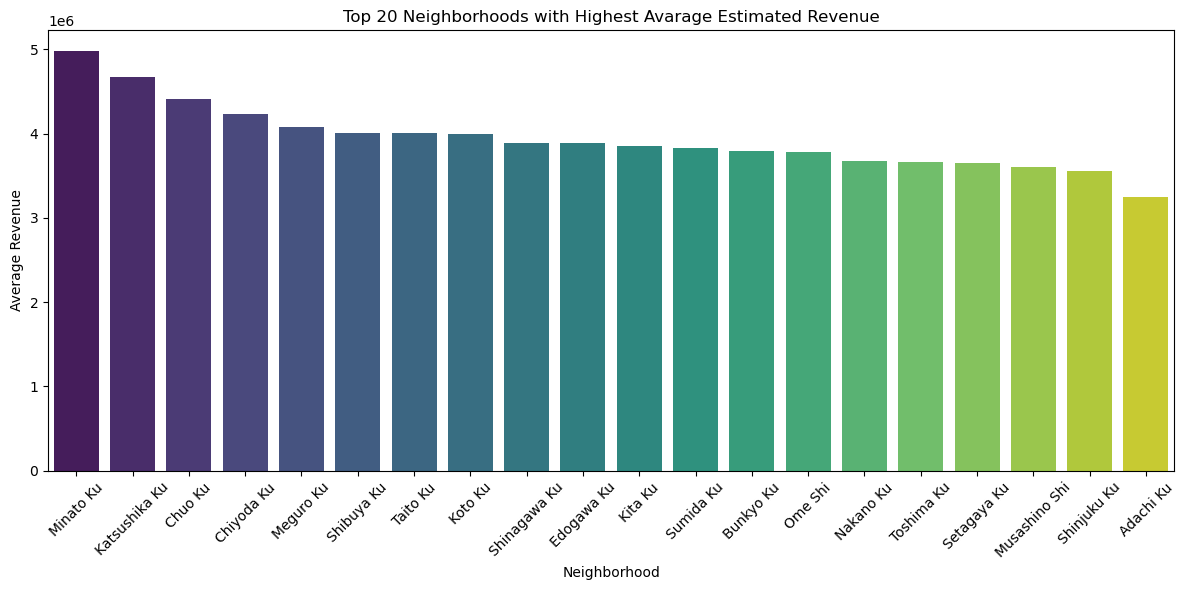

In [143]:
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_area.head(20), x="neighbourhood_cleansed", y="estimated_revenue", hue ="neighbourhood_cleansed", palette="viridis")
plt.title("Top 20 Neighborhoods with Highest Avarage Estimated Revenue")
plt.xlabel("Neighborhood")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('price_avail_rev.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

The table of medians below shows that Shinjuku and Shibuya are next to each other with only 3 days difference, but with 12 steps difference in revenue. 

In [145]:
avl_stats = list_area_df.groupby('neighbourhood_cleansed').agg(
    median_avl = ('availability_365','median'),
).reset_index()
avl_stats.sort_values(by='median_avl', ascending=False)

,neighbourhood_cleansed,median_avl
18,Ome Shi,272.0
14,Mitaka Shi,197.0
20,Setagaya Ku,188.0
15,Musashino Shi,178.0
6,Hachioji Shi,177.0
5,Edogawa Ku,172.5
10,Koto Ku,172.0
12,Meguro Ku,171.0
22,Shinagawa Ku,169.5
2,Bunkyo Ku,165.0


## Method 2: price x reviews per month
Calculated estimated revenue by number of reviews per month per neighbourhood. The numbers may not be accurate, but this method may better show proportions between areas. 

In [147]:
#Lets use another way to calculate possible revenue 
list_area_df['estimated_revenue_by_reviews'] = list_area_df['price'] * list_area_df['reviews_per_month'] * 12
income_by_neigh = list_area_df.groupby('neighbourhood_cleansed')['estimated_revenue_by_reviews'].mean().reset_index()
income_by_neigh = income_by_neigh.sort_values(by='estimated_revenue_by_reviews', ascending=False)

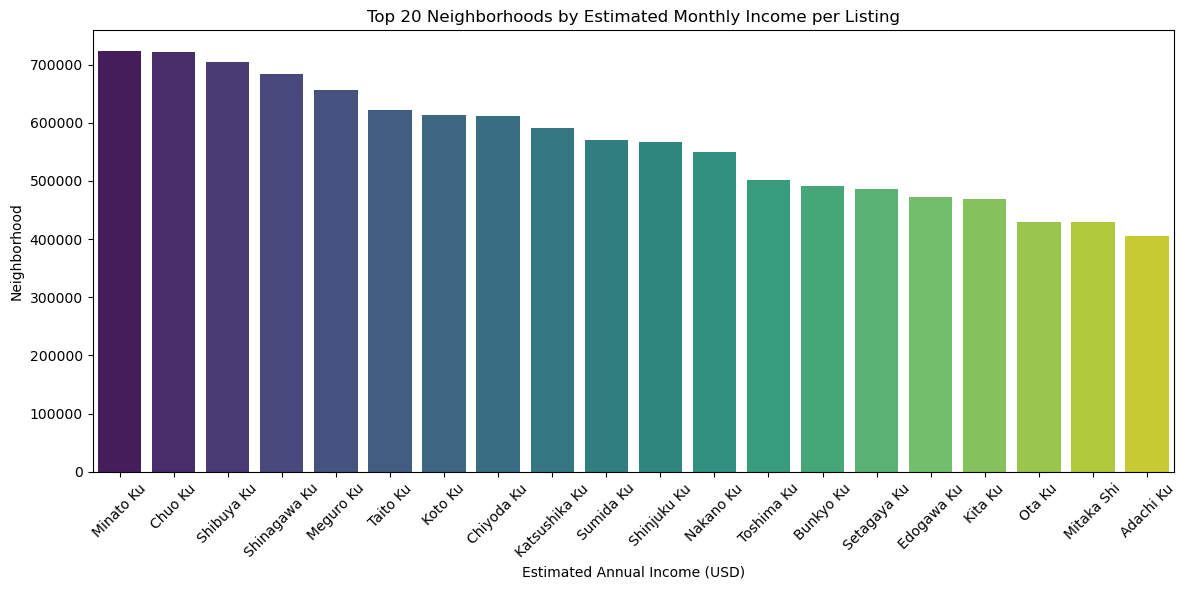

In [148]:
plt.figure(figsize=(12, 6))
sns.barplot(data=income_by_neigh.head(20), y='estimated_revenue_by_reviews', x='neighbourhood_cleansed',hue ="neighbourhood_cleansed", palette='viridis')
plt.title('Top 20 Neighborhoods by Estimated Monthly Income per Listing')
plt.xlabel('Estimated Annual Income (USD)')
plt.xticks(rotation=45)
plt.ylabel('Neighborhood')
plt.tight_layout()
#plt.savefig('review_revenue.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

Let's combine two methods together.

In [150]:
list_area_df['combined_estimated_revenue'] = (
    (list_area_df['estimated_revenue']*0.2) + (list_area_df['estimated_revenue_by_reviews']*0.8)
) 

In [151]:
combined_revenue_by_area = list_area_df.groupby('neighbourhood_cleansed')['combined_estimated_revenue'].mean().reset_index()
combined_revenue_by_area = combined_revenue_by_area.sort_values(by='combined_estimated_revenue', ascending=False)

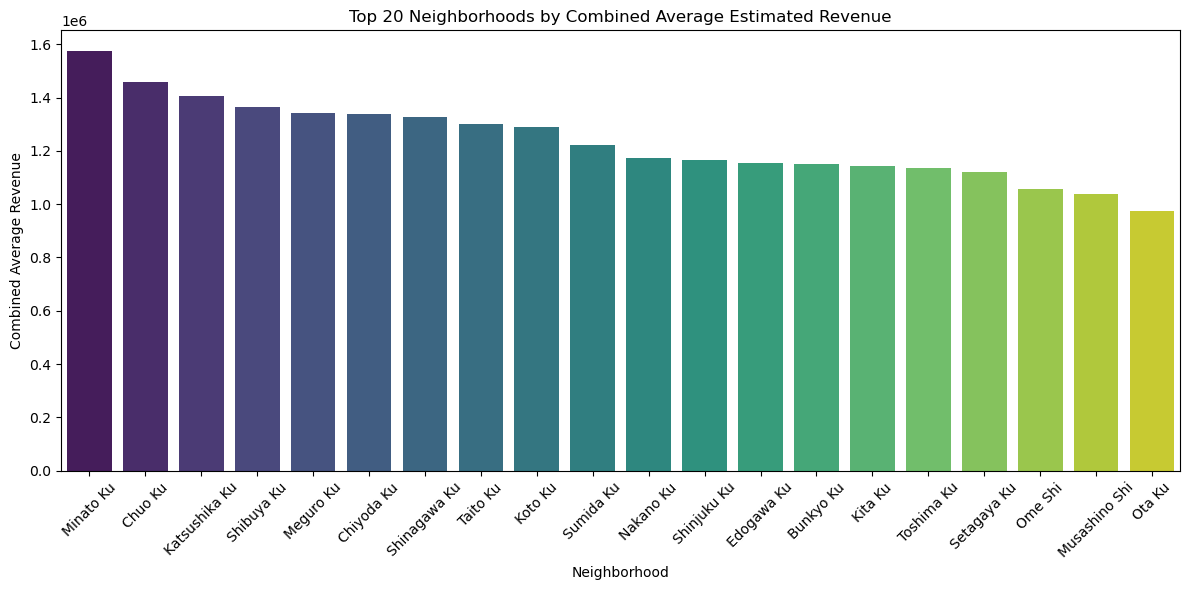

In [152]:
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_revenue_by_area.head(20), x="neighbourhood_cleansed", y="combined_estimated_revenue", hue="neighbourhood_cleansed", palette="viridis")
plt.title("Top 20 Neighborhoods by Combined Average Estimated Revenue")
plt.xlabel("Neighborhood")
plt.ylabel("Combined Average Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('comb_revenue.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

Visualizing top 10 areas by estimated revenue on plotly map. 

In [154]:
#Figure for top 10 revenues 
top_revenue_areas = combined_revenue_by_area.head(10)['neighbourhood_cleansed']
top_revenue = list_area_df[list_area_df['neighbourhood_cleansed'].isin(top_revenue_areas)]

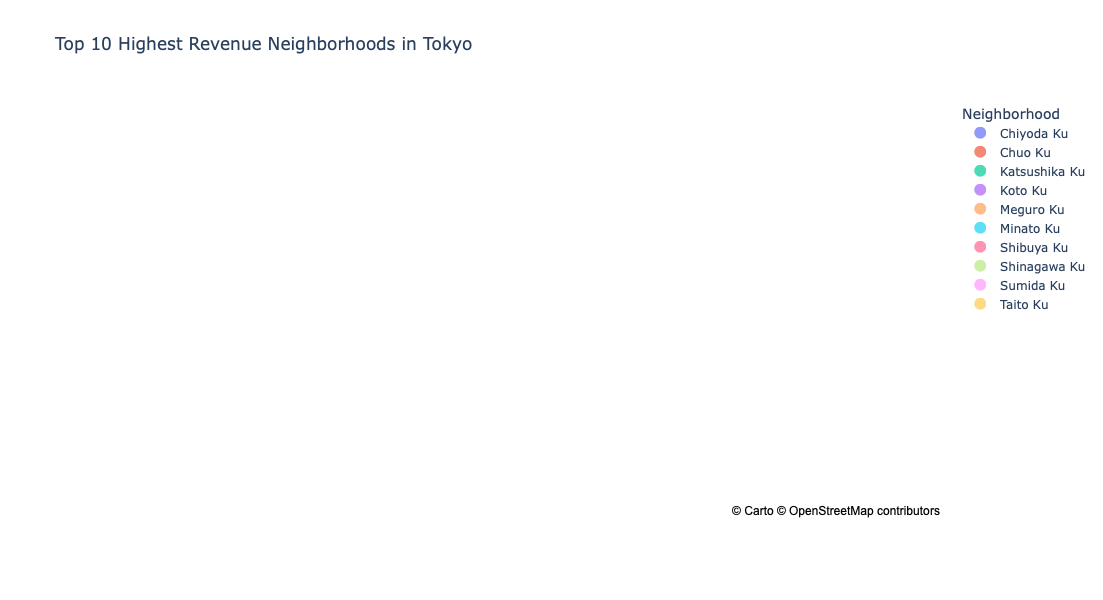

In [272]:
neigh_top_revenue = top_revenue.groupby('neighbourhood_cleansed').agg(
    latitude=('latitude', 'mean'),
    longitude=('longitude', 'mean'),
    estimated_rev = ('combined_estimated_revenue','mean')
).reset_index()

fig_top_r = px.scatter_mapbox(
    neigh_top_revenue,
    lat='latitude',
    lon='longitude',
    size='estimated_rev',
    color='neighbourhood_cleansed', 
    hover_name='neighbourhood_cleansed',
    size_max=30,
    title='Top 10 Highest Revenue Neighborhoods in Tokyo',
    mapbox_style="carto-positron",
    zoom=11,  
    height=600,
)
fig_top_r.update_layout(legend_title="Neighborhood")
fig_top_r.show()
#Saved the map on my computer as html link to keep it interactive
#pio.write_html(fig_top_r, 'interactive_map_com.html', include_plotlyjs='cdn')

In [156]:
#almost no highly booked listings with low acceptance rate. that mean the listings are not manually blocked

Top-15 areas with the highest number of reviews and average prices. 

In [158]:
#Let find avg prices for the areas with highest number of reviews 
top_reviews = list_area_df.groupby('neighbourhood_cleansed').agg({
    'price': 'mean',
    'number_of_reviews': 'sum'
}).sort_values('number_of_reviews', ascending=False).head(15)

Text(0.5, 0, 'Neighborhood')

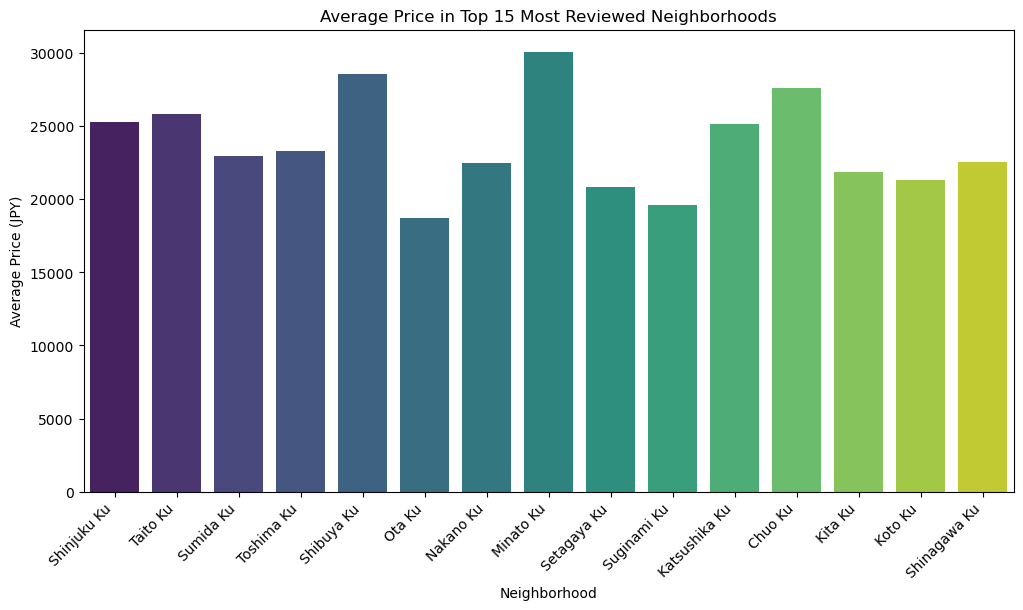

In [159]:


plt.figure(figsize=(12, 6))
sns.barplot(data = top_reviews, x='neighbourhood_cleansed', y='price',  hue ="neighbourhood_cleansed", palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Average Price in Top 15 Most Reviewed Neighborhoods')
plt.ylabel('Average Price (JPY)')
plt.xlabel('Neighborhood')

In [160]:
#Let try to find areas that are best values for its money, grouping by neighbourhood and comparing avg rating and price 


In [161]:
df_short_active.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15454 entries, 197677 to 1318814961432616144
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   name                                          15454 non-null  object        
 1   host_id                                       15454 non-null  int64         
 2   host_since                                    15454 non-null  datetime64[ns]
 3   host_response_time                            15454 non-null  object        
 4   host_response_rate                            15454 non-null  float64       
 5   host_acceptance_rate                          15454 non-null  float64       
 6   host_is_superhost                             15454 non-null  boolean       
 7   host_listings_count                           15454 non-null  float64       
 8   host_has_profile_pic                          15454 